The MNIST dataset contains 28 by 28 grayscale images of single handwritten digits between 0 and 9. The set consists  70,000 images, the training set having 60,000 and the test set has 10,000.

Pytorch as “t”

MNSIT dataset from torchvision.datasets

torchvision.transforms so we can transform our image to fit our model

torch.nn as nn to build our actual neural network

matplotlib to visualize our results at the end


In [8]:
import torch as t
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

Use of dataLoader class: because they generate your data on multiple cores in real-time, and straight away feed it into your deep learning model.

Batch_size, which denotes the number of samples contained in each generated

In [9]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

Normalizing to  increase the model efficiency 


MODEL

This is a simple feedforward network that has 3 layers: an input layer, a hidden layer, and an output layer.

Here,self.linear1 is the input layer takes 28*28 pixels in each image,100 which is the size of the output.

elf.linear2 is the hidden layer, which takes in the output of the previous layer for the input, and has an output size of 50.

self.final is the output layer which takes in the output of the previous layer for the input and will output size of 10 since we have 10 values within this dataset (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).

ReLU activation function:output the input if it is positive, otherwise outputting the value of zero

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 100) 
        self.linear2 = nn.Linear(100, 50) 
        self.final = nn.Linear(50, 10)
        self.relu = nn.ReLU()

    def forward(self, img): #convert + flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x
net = Net()

Above we have the forward function forward() which will actually feed the data through our network.

we must use img.view(-1, 28*28) to reshape the images for the model.

LOSS FUNCTION:

Using cross-entropy for our loss function which is a difference between two probability distributions when given a random set of dataset.

Adam optimization is a stochastic gradient descent method 

epoch 10 : when an ENTIRE dataset is passed forward and backward through the neural network ten times

iterate over the range of epochs and call the train() function on our model.

x will represent the batch of features, and y will represent the batch of targets.

optimizer.zero_grad() to set the gradients to 0 before each loss calculation.

net(x.view(-1, 28*28)) will pass in our reshaped batch.

Then we will use our cross-entropy function to calculate and grab the loss value.

After we need loss.backward() to apply the loss back through the network’s parameters.

Finally, we need optimizer.step() to optimize weights to account for loss and gradients.

In [14]:
cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001) #e-1
epoch = 10

for epoch in range(epoch):
    net.train()

    for data in train_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()

This loop will iterate over the test set and measure for correctness but comparing output to target values. Afterwards, we will receive an accuracy summary.

In [17]:
correct=0
total=0
with t.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.966


VISULIZATION:

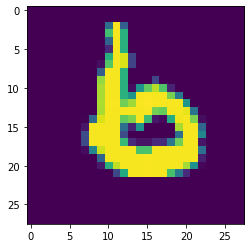

tensor(6)


In [18]:
plt.imshow(x[9].view(28, 28))
plt.show()
print(t.argmax(net(x[9].view(-1, 784))[0]))

The tensor and image on matplotlib have the same values,so successfully trained this neural network to recognize handwritten digits from the MNIST dataset.